#### STEP 1

In [282]:
# utilities
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [283]:
DATASET_COLUMNS = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest']

DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv('C:/Users/Deceptacon/Desktop/TWEETS ANALYSIS/tweets_dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
5862,1630344235827298305,1630344235827298305,2023-02-27 23:08:50 UTC,2023-02-27,23:08:50,+0000,22168210,hdevreij,Hans de Vreij,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3796,1630351430241464320,1630351430241464320,2023-02-27 23:37:26 UTC,2023-02-27,23:37:26,+0000,1559461230301122560,freedombird101,Freedombird101,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1753,1630358985407623169,1630288658636099584,2023-02-28 00:07:27 UTC,2023-02-28,00:07:27,+0000,136005760,willpatterson74,BaddWolff,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mikepompeo', 'name': 'Mike P...",NaN,NaN,NaN,NaN
1559,1630359865813254144,1630000520466165762,2023-02-28 00:10:57 UTC,2023-02-28,00:10:57,+0000,1942401919,lovs2type,Laura Fadgen,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'just2draw', 'name': 'Peter G...",NaN,NaN,NaN,NaN
9560,1630332610399571971,1629191878699806721,2023-02-27 22:22:39 UTC,2023-02-27,22:22:39,+0000,1494439231241994248,ed97554968,MariaÃ±Ã±a,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sparky1980m', 'name': 'Spark...",NaN,NaN,NaN,NaN


In [284]:
df.head

<bound method NDFrame.head of                         id      conversation_id               created_at  \
0                       id      conversation_id               created_at   
1      1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
2      1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
3      1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
4      1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
...                    ...                  ...                      ...   
10010  1630331110415646721  1630305860298633216  2023-02-27 22:16:41 UTC   
10011  1630331106305122304  1630202100369043459  2023-02-27 22:16:40 UTC   
10012  1630331106296844288  1630301689818275840  2023-02-27 22:16:40 UTC   
10013  1630331102480171009  1630181795101540357  2023-02-27 22:16:39 UTC   
10014  1630331101817233414  1630248150954049537  2023-02-27 22:16:39 UTC   

             date      time  timezone              user_i

In [285]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [286]:
print('length of data is', len(df))

length of data is 10015


In [287]:
df. shape

(10015, 36)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10015 non-null  object
 1   conversation_id  10015 non-null  object
 2   created_at       10015 non-null  object
 3   date             10015 non-null  object
 4   time             10015 non-null  object
 5   timezone         10015 non-null  object
 6   user_id          10015 non-null  object
 7   username         10015 non-null  object
 8   name             10015 non-null  object
 9   place            4 non-null      object
 10  tweet            10015 non-null  object
 11  language         10015 non-null  object
 12  mentions         10015 non-null  object
 13  urls             10015 non-null  object
 14  photos           10015 non-null  object
 15  replies_count    10015 non-null  object
 16  retweets_count   10015 non-null  object
 17  likes_count      10015 non-null

In [288]:
df.dtypes

id                 object
conversation_id    object
created_at         object
date               object
time               object
timezone           object
user_id            object
username           object
name               object
place              object
tweet              object
language           object
mentions           object
urls               object
photos             object
replies_count      object
retweets_count     object
likes_count        object
hashtags           object
cashtags           object
link               object
retweet            object
quote_url          object
video              object
thumbnail          object
near               object
geo                object
source             object
user_rt_id         object
user_rt            object
retweet_id         object
reply_to           object
retweet_date       object
translate          object
trans_src          object
trans_dest         object
dtype: object

In [289]:
np.sum(df.isnull().any(axis=1))

10014

In [290]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   36
Count of rows in the data is:   10015


In [291]:
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [292]:
def get_tweet_sentiment(text):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(text)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [293]:
filtered_tweets = df.head(10000)

In [294]:
tweets = []
sentiments = []
for index, tweet in filtered_tweets.iterrows():
            parsed_tweet = {}
            
            # Saving text of tweet
            parsed_tweet['tweet'] = tweet['tweet']
            # Saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['tweet'])
            sentiments.append(parsed_tweet['sentiment'])
            # Appending parsed tweet to tweets list
            tweets.append(parsed_tweet)

In [296]:
filtered_tweets.loc[:, 'sentiment'] = sentiments

In [297]:
filtered_tweets['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [298]:
filtered_tweets['sentiment'].nunique()

3

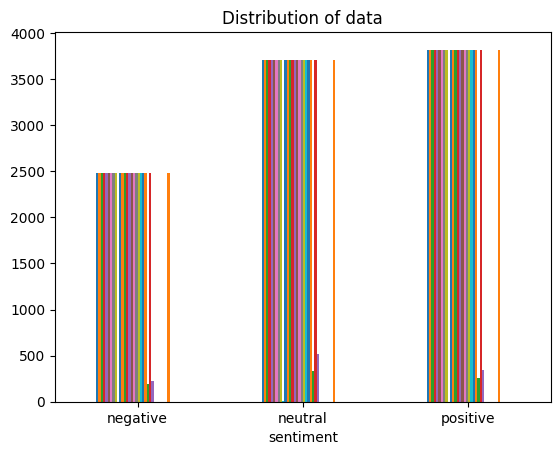

In [92]:
# Plotting the distribution for dataset.
ax = filtered_tweets.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['negative', 'neutral', 'positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(filtered_tweets['tweet']), list(filtered_tweets['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

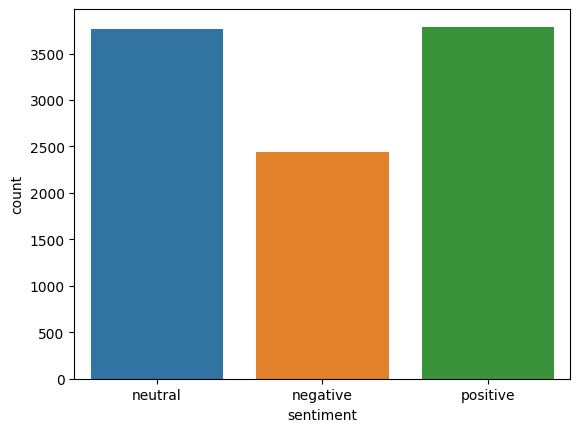

In [299]:
import seaborn as sns
sns.countplot(x='sentiment', data = filtered_tweets)

### Data Preprocessing
In the above-given problem statement, before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed, thereby reducing the unnecessary noise from the dataset. After that, we also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form, known as lemma) for better results.

 Selecting the tweet and sentiment column for our further analysis

In [301]:
data = filtered_tweets[['tweet','sentiment']]

Separating positive, negative and neutral tweets

In [302]:
data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [303]:
from nltk.tokenize import word_tokenize

# Assuming data is the original DataFrame
data['tweet'] = data['tweet'].apply(lambda text: word_tokenize(text))

C:\Users\Deceptacon\AppData\Local\Temp\ipykernel_11072\2814808294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda text: word_tokenize(text))


In [304]:
# Assuming data is the original DataFrame
data_pos = data[data['sentiment'] == "positive"].copy()  # Make sure to use copy()
data_neg = data[data['sentiment'] == "negative"].copy()  # Make sure to use copy()
data_neu = data[data['sentiment'] == "neutral"].copy()   # Make sure to use copy()

Flatten the lists in the 'tweet' column

In [305]:
# Flatten the lists in the 'tweet' column
data_pos['tweet'] = data_pos['tweet'].apply(lambda lst: ' '.join(lst))
data_neg['tweet'] = data_neg['tweet'].apply(lambda lst: ' '.join(lst))
data_neu['tweet'] = data_neu['tweet'].apply(lambda lst: ' '.join(lst))

Combining positive, neutral and negative tweets

In [306]:
# Concatenate the DataFrames
dataset = pd.concat([data_pos, data_neg, data_neu])

In [307]:
dataset.head

<bound method NDFrame.head of                                                   tweet sentiment
7     Riyadhð¸ð¦ Im here in Exit8_Al Yarmuk and ...  positive
8     @ kathykrobot @ RonFilipkowski Hmm . Zelensky ...  positive
12    @ elonmusk `` The CEO of Tesla warns that the ...  positive
13    The United States imposed more tariffs and ste...  positive
17    4/ But the Moldovan president 's accusations w...  positive
...                                                 ...       ...
9980  @ POTUS no âweâ wonât . âWeâ the peo...   neutral
9986  @ SamRamani2 China is about to burn its finger...   neutral
9990  @ POTUS Pedo Peter ... Did you commit an ACT O...   neutral
9994  @ MisesNy The aggressor is # RuSSia Coglione h...   neutral
9996               @ Billbrowder Lets Go , Russia ! ! !   neutral

[10000 rows x 2 columns]>

In [308]:
dataset.columns

Index(['tweet', 'sentiment'], dtype='object')

In [309]:
dataset.sample(10)

,tweet,sentiment
8555,âAs China and Russia are making moves to pro...,neutral
77,@ RpsAgainstTrump Sure . I support Ukraine fig...,positive
2359,RED ALERT ! Russia Issues Alarming Threat of A...,negative
7663,@ EndWokeness Americas biggest threat isnât ...,positive
4217,"@ Noahpinion Help by leaving you , go to Russi...",positive
1707,"@ RHPalmerston3 @ JackPosobiec Unfortunately ,...",negative
5048,Ã divertido que a indÃºstria de defesa russa ...,neutral
5945,@ cmioffice @ IntlCrimCourt # LyingMinisters ....,negative
6178,@ IAPonomarenko And yet .... still not winning...,negative
7839,@ sashafrp @ mupps11 @ ClareDalyMEP To be fran...,positive


Making statement text in lowercase

In [310]:
dataset['tweet'] = dataset['tweet'].str.lower()
dataset['tweet'].tail()

9980    @ potus no âweâ wonât . âweâ the peo...
9986    @ samramani2 china is about to burn its finger...
9990    @ potus pedo peter ... did you commit an act o...
9994    @ misesny the aggressor is # russia coglione h...
9996                 @ billbrowder lets go , russia ! ! !
Name: tweet, dtype: object

Defining set containing all stopwords in English.

In [311]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

Cleaning and removing the above stop words list from the tweet text

In [312]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweet'].head()

7     riyadhð¸ð¦ im exit8_al yarmuk exit12_al ma...
8     @ kathykrobot @ ronfilipkowski hmm . zelensky ...
12    @ elonmusk `` ceo tesla warns prolongation rus...
13    united states imposed tariffs steel aluminum i...
17    4/ but moldovan president 's accusations follo...
Name: tweet, dtype: object

Cleaning and removing punctuations

In [313]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

9980     potus no âweâ wonât  âweâ people r ...
9986     samramani2 china burn fingers russian gas  hy...
9990     potus pedo peter  commit act war russia germa...
9994     misesny aggressor  russia coglione https  tco...
9996                       billbrowder lets go  russia   
Name: tweet, dtype: object

Cleaning and removing repeating characters

In [314]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

9980     potus no âweâ wonât  âweâ people r ...
9986     samramani2 china burn fingers russian gas  hy...
9990     potus pedo peter  commit act war russia germa...
9994     misesny aggressor  russia coglione https  tco...
9996                       billbrowder lets go  russia   
Name: tweet, dtype: object

Cleaning and removing URLs

In [315]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

9980     potus no âweâ wonât  âweâ people r ...
9986     samramani2 china burn fingers russian gas  hy...
9990     potus pedo peter  commit act war russia germa...
9994     misesny aggressor  russia coglione https  tco...
9996                       billbrowder lets go  russia   
Name: tweet, dtype: object

Cleaning and removing numeric numbers

In [316]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

9980     potus no âweâ wonât  âweâ people r ...
9986     samramani china burn fingers russian gas  hyp...
9990     potus pedo peter  commit act war russia germa...
9994     misesny aggressor  russia coglione https  tco...
9996                       billbrowder lets go  russia   
Name: tweet, dtype: object

Getting tokenization of tweet text

In [247]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
# dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
# dataset['tweet'].head()


TypeError: expected string or bytes-like object

Applying stemming

In [317]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].head()

7     riyadhð¸ð¦ im exital yarmuk exial malaz ex...
8      kathykrobot  ronfilipkowski hmm  zelensky cow...
12     elonmusk  ceo tesla warns prolongation russia...
13    united states imposed tariffs steel aluminum i...
17     but moldovan president s accusations followed...
Name: tweet, dtype: object

Applying lemmatizer

In [318]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

7     riyadhð¸ð¦ im exital yarmuk exial malaz ex...
8      kathykrobot  ronfilipkowski hmm  zelensky cow...
12     elonmusk  ceo tesla warns prolongation russia...
13    united states imposed tariffs steel aluminum i...
17     but moldovan president s accusations followed...
Name: tweet, dtype: object

Separating input feature and label

In [319]:
X = data.tweet
y = data.sentiment

Plot a cloud of words for negative tweets

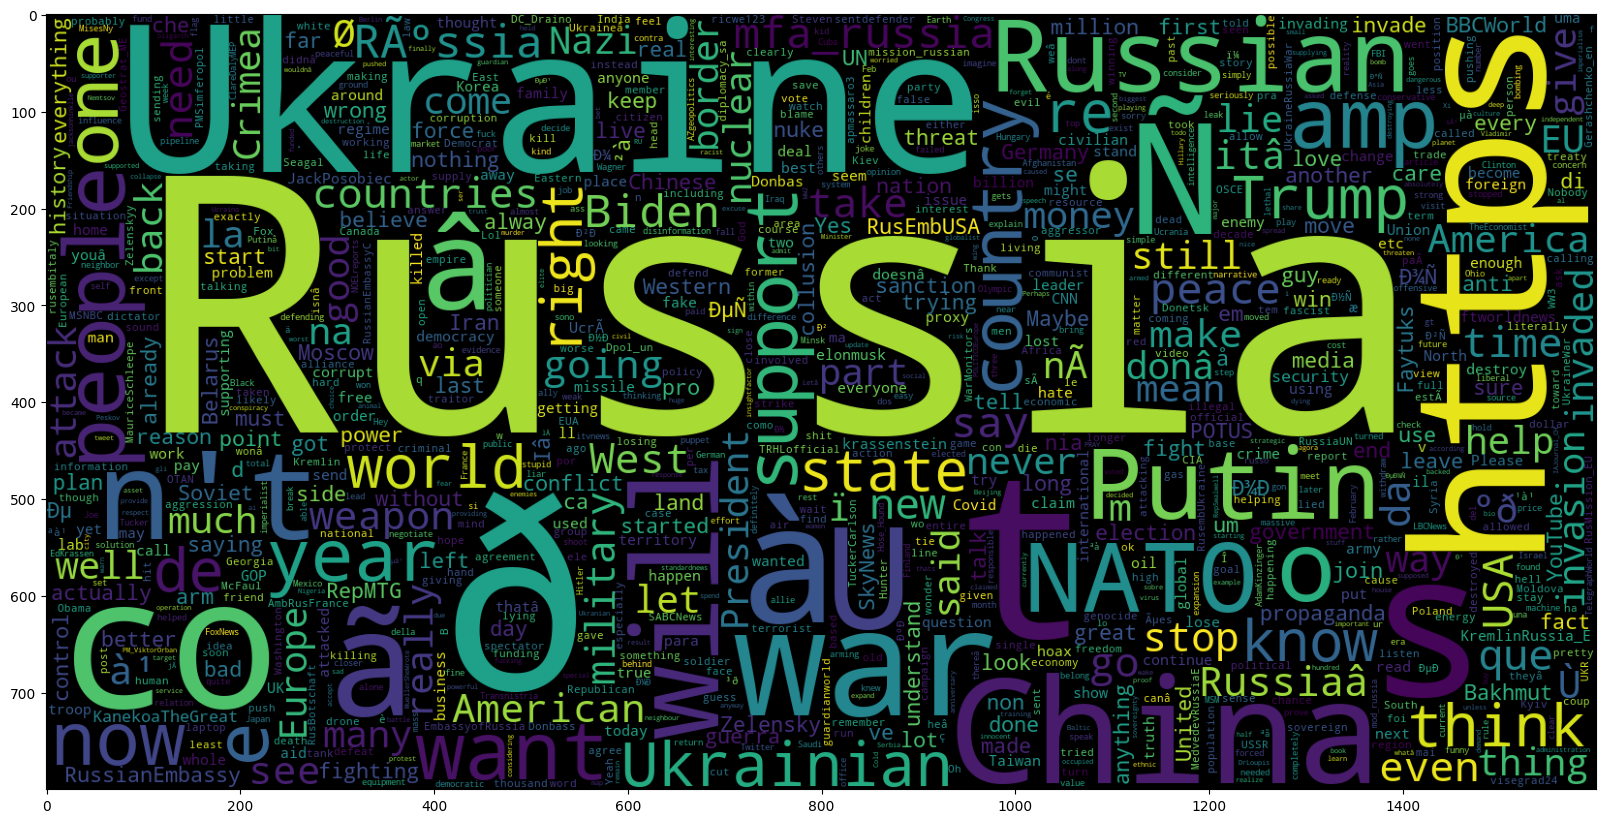

In [320]:
# data_neg = data['tweet'][:10000]
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(data_neg))
# plt.imshow(wc)
data_neg = data['tweet'][:10000]

# Flatten the lists of words in the 'tweet' column
flat_data_neg = [word for tweet_words in data_neg for word in tweet_words]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(flat_data_neg))
plt.imshow(wc)

Plot a cloud of words for positive tweets

In [321]:
print(data_pos)

                                                  tweet sentiment
7     Riyadhð¸ð¦ Im here in Exit8_Al Yarmuk and ...  positive
8     @ kathykrobot @ RonFilipkowski Hmm . Zelensky ...  positive
12    @ elonmusk `` The CEO of Tesla warns that the ...  positive
13    The United States imposed more tariffs and ste...  positive
17    4/ But the Moldovan president 's accusations w...  positive
...                                                 ...       ...
9988  @ SgforgoodStella God , I love Russia . And Go...  positive
9989  @ CNN There is an old , Vulcan proverb : 'Only...  positive
9992  These heads-of-state 's private beliefs about ...  positive
9995  @ bitcornd @ nexta_tv Exactly . Now tell me ag...  positive
9997  @ Hose_Hound @ JackPosobiec Yes . Isnât it f...  positive

[3789 rows x 2 columns]


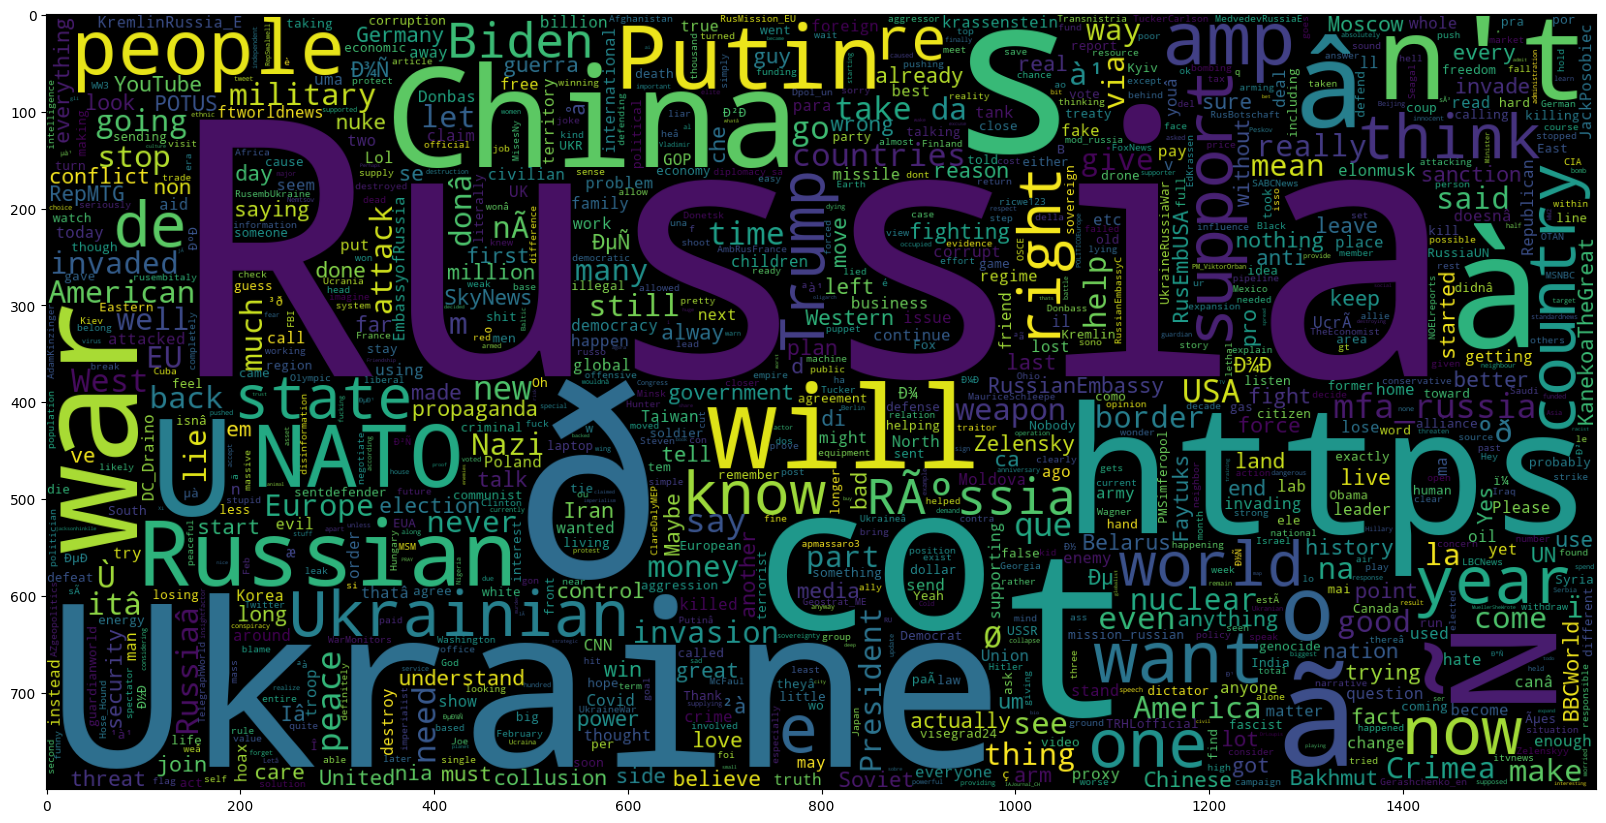

In [326]:

#Flatten the lists of words in the 'tweet' column
flat_data_pos = [word for tweet_words in data_pos for word in tweet_words]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(flat_data_pos))
plt.imshow(wc)

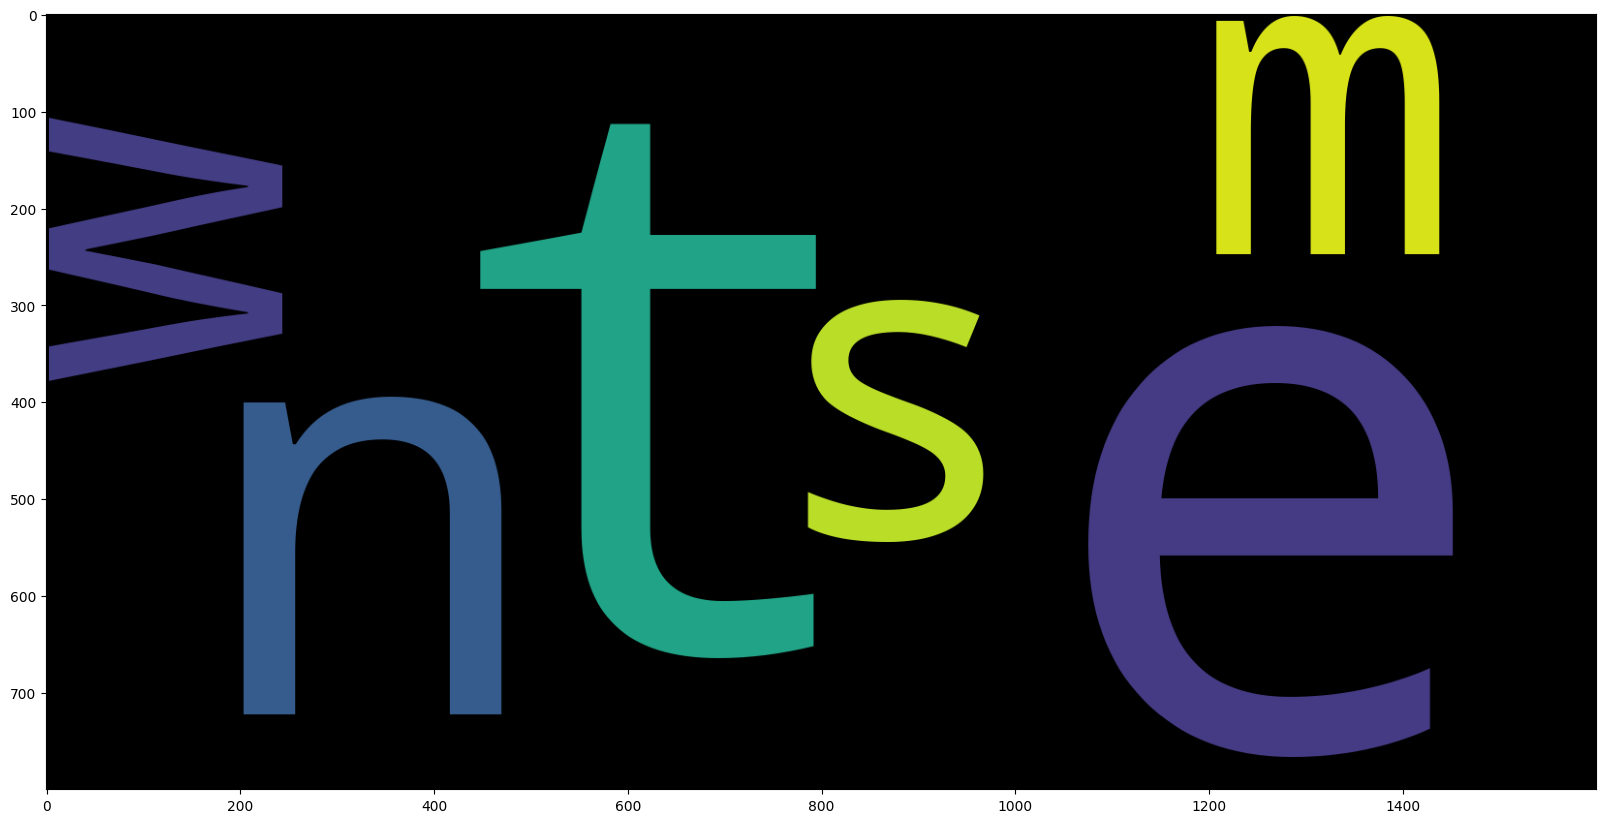

In [327]:
#Flatten the lists of words in the 'tweet' column
flat_data_neu = [word for tweet_words in data_neu for word in tweet_words]

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(flat_data_neu))
plt.imshow(wc)

Splitting Our Data Into Train and Test Subsets

In [357]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

## Transforming the Dataset Using TF-IDF Vectorizer
#### Fit the TF-IDF Vectorizer

In [358]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train is a list of lists of words (tweets)
# Convert each list of words into a single string
X_train_strings = [" ".join(tweet_words) for tweet_words in X_train]

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectorizer.fit(X_train_strings)
print('No. of feature_words:', len(vectorizer.get_feature_names_out()))

No. of feature_words: 100000


Transform the data using TF-IDF Vectorizer

In [359]:

# Assuming X_train is a list of lists of words (tweets)
# Convert each list of words into a single string
X_train_strings = [" ".join(tweet_words) for tweet_words in X_train]

# Transform the data using the vectorizer
X_train_transformed = vectorizer.transform(X_train_strings)


X_test_strings = [" ".join(tweet_words) for tweet_words in X_test]
X_test_transformed = vectorizer.transform(X_test_strings)

## Function for Model Evaluation

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

Accuracy Score
Confusion Matrix with Plot
ROC-AUC Curve

In [360]:
def model_Evaluate(model):
    y_pred = model.predict(X_test_transformed)
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    
    # Ensure labels has the same shape as cf_matrix
    labels = np.asarray(labels).reshape(2, 2) if cf_matrix.shape == (2, 2) else None
    
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

### Model Building
In the problem statement, we have used three different models respectively :

- Bernoulli Naive Bayes Classifier
- SVM (Support Vector Machine)
- Logistic Regression

The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

##### Model-1

              precision    recall  f1-score   support

    negative       0.83      0.04      0.08       122
     neutral       0.64      0.78      0.71       188
    positive       0.52      0.73      0.61       190

    accuracy                           0.58       500
   macro avg       0.67      0.52      0.46       500
weighted avg       0.64      0.58      0.52       500



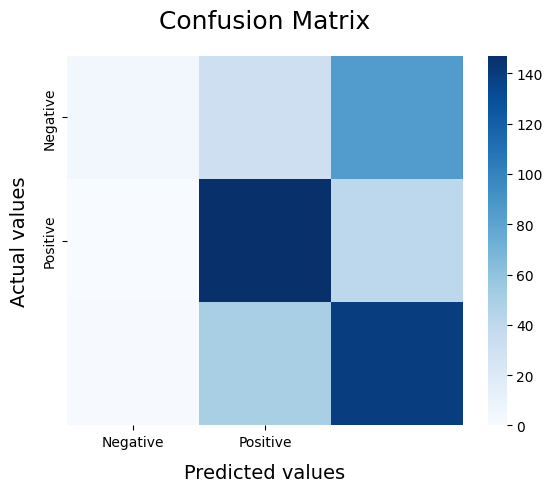

In [361]:
# BNBmodel = BernoulliNB()
# BNBmodel.fit(X_train, y_train)
# model_Evaluate(BNBmodel)
# y_pred1 = BNBmodel.predict(X_test)
# Create and fit the BernoulliNB model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_transformed, y_train)
model_Evaluate(BNBmodel)
# Make predictions
y_pred1 = BNBmodel.predict(X_test_transformed)

#### Model-2:

              precision    recall  f1-score   support

    negative       0.65      0.60      0.62       122
     neutral       0.80      0.74      0.77       188
    positive       0.66      0.73      0.69       190

    accuracy                           0.70       500
   macro avg       0.70      0.69      0.69       500
weighted avg       0.71      0.70      0.70       500



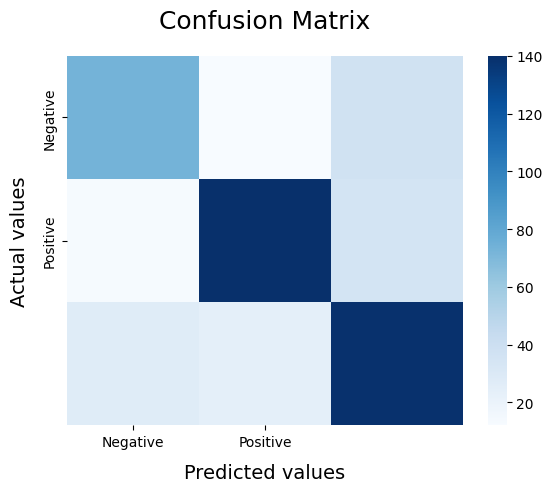

In [364]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_transformed, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_transformed)

#### Model-3

              precision    recall  f1-score   support

    negative       0.69      0.51      0.58       122
     neutral       0.80      0.74      0.77       188
    positive       0.64      0.80      0.71       190

    accuracy                           0.71       500
   macro avg       0.71      0.68      0.69       500
weighted avg       0.72      0.71      0.70       500



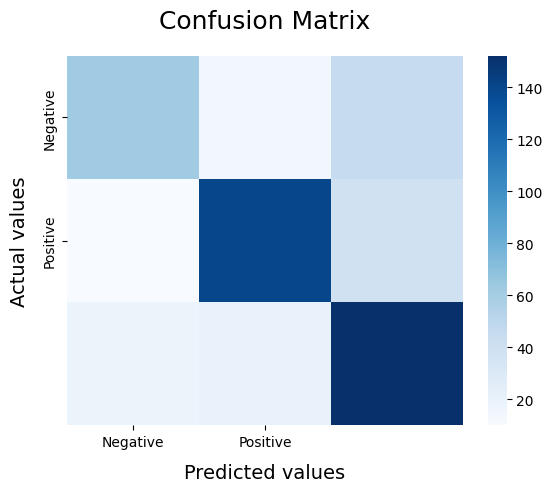

In [365]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_transformed, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test_transformed)

## Model Evaluation
Upon evaluating all the models, we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

##### F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)

(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

##### AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that for a particular problem statement, if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model. Therefore, the concept holds true for the above-mentioned dataset.


## Key Takeaways

Twitter Sentimental Analysis is used to identify as well as classify the sentiments that are expressed in the text source.
Logistic Regression, SVM, and Naive Bayes are some of the ML algorithms that can be used for Twitter Sentimental Analysis.

#### Export Model

In [368]:
import pickle

model_path = "C:/Users/Deceptacon/Desktop/TWEETS ANALYSIS/models/logistic_regression_model.pkl"
vectorizer_path = "C:/Users/Deceptacon/Desktop/TWEETS ANALYSIS/models/vectorizer.pkl"

# Save the trained model and vectorizer using pickle
with open(model_path, 'wb') as model_file:
    pickle.dump(LRmodel, model_file)

with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

#### Test Model On Sample Text

In [379]:
# Load the trained model and vectorizer using pickle
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(vectorizer_path, 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)
    
    
try:
       
        text = "Ukraine will fight the war badly as people die, there will be death and evil"
        
        # Convert the text into numerical features using the loaded vectorizer
        text_vec = vectorizer.transform([text])
        
        # Make predictions using the loaded model
        prediction = model.predict(text_vec)[0]
        
        print({'sentiment': prediction})
    
except Exception as e:
        print(str(e))

{'sentiment': 'negative'}


## Happy Implementation 😁